# Mapping the "griddiness" of cities

### Step 1: Importing our data

In [1]:
# Useful imports, if you're missing any, you should probably just install anaconda.
import numpy as np
import scipy as sp
import scipy.misc
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

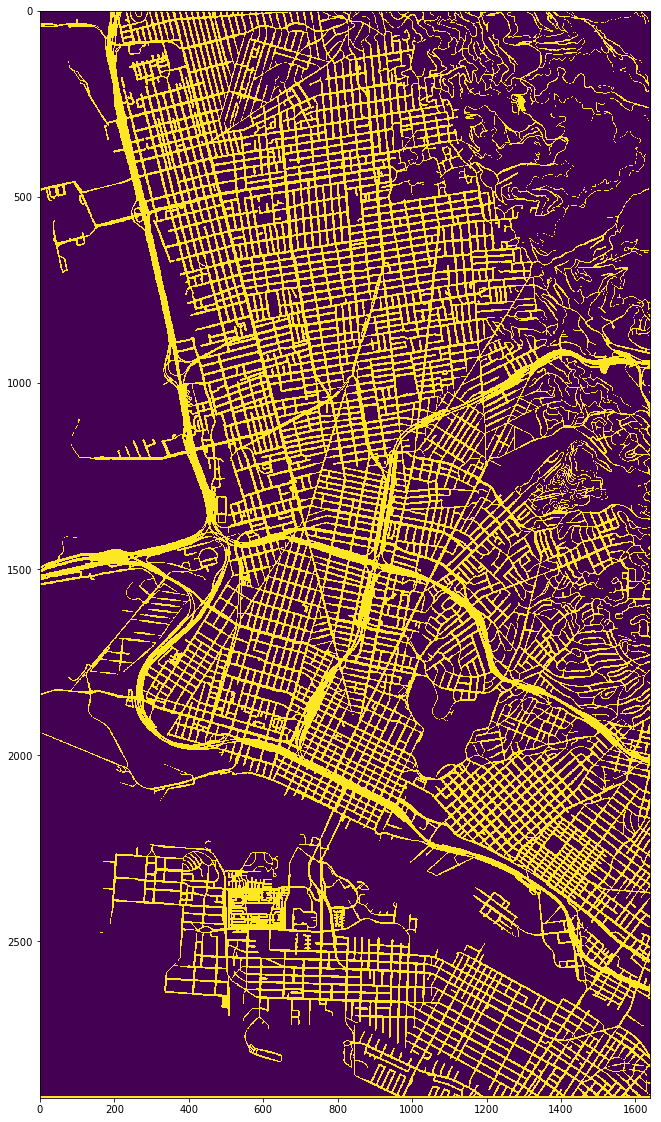

In [2]:
og_streetmap = np.sum(sp.misc.imread("capture3.PNG"),2)>600
plt.figure(figsize=(20,20))
plt.imshow(og_streetmap)
og_streetmap

### Step 2: Filtering

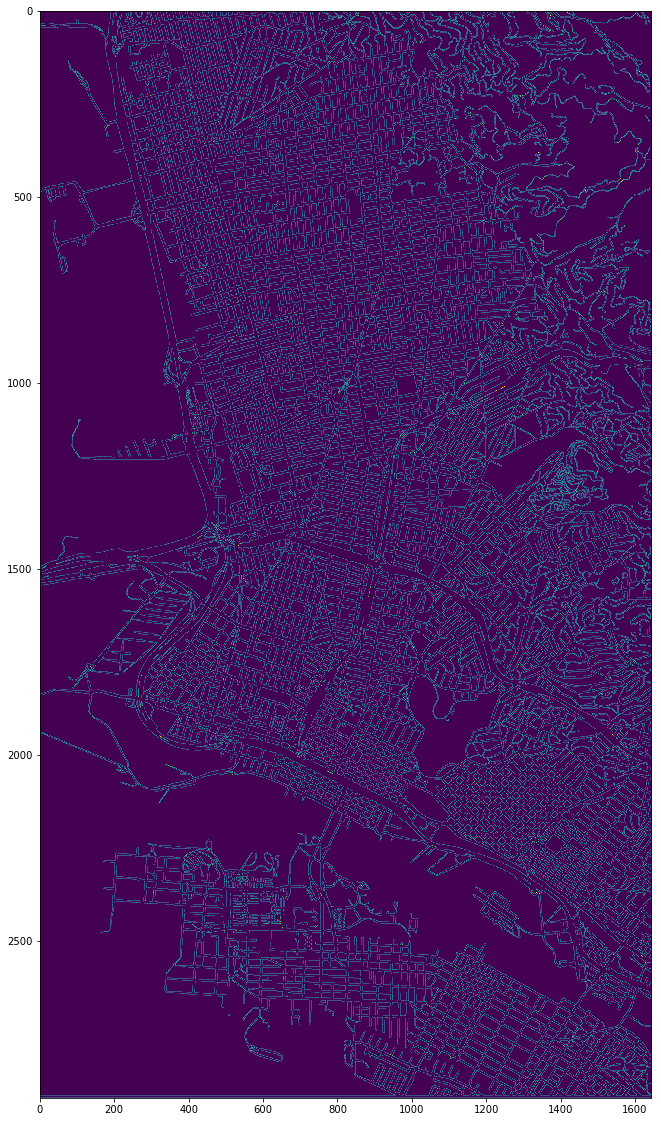

In [3]:
discrete_laplacian=np.matrix([[0,1,0],[1,-4,1],[0,1,0]])
highpassed_streetmap=np.abs(sp.signal.convolve2d(og_streetmap,discrete_laplacian))
plt.figure(figsize=(20,20))
plt.imshow(highpassed_streetmap)

### Determining Orientation
To determine orientation, 

In [4]:
size=100
def getOrientedConvElement(theta):
    cosT=np.cos(-theta)
    sinT=np.sin(-theta)
    cvl=np.zeros([size,size])
    for x in np.r_[-size/2.:size/2.]:
        for y in np.r_[-size/2.:size/2.]:
            cvl[int(size/2+x),int(size/2+y)]=np.exp(-((cosT*x-sinT*y)/2)**2-((sinT*x+cosT*y)/25)**2)#* \
                   #(1-np.exp(-((sinT*x+cosT*y)/200)**2))
            '''xy=np.matrix([[x],[y]])
            projbasis=np.matrix([[np.cos(theta),np.sin(theta)]])
            projcoord=(projbasis*xy)[0,0]
            rem=xy-projcoord*projbasis.T
            nrem=np.sqrt(rem.T*rem)
            if 9<nrem and nrem<15:
                cvl[int(50+x),int(50+y)]=1'''
    return cvl/np.max(cvl)

Here, you can see an example of such a convolutional element:

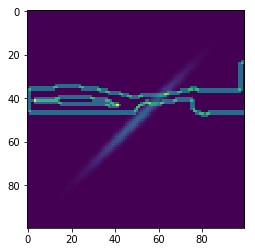

In [5]:
plt.imshow(getOrientedConvElement(3.14/4)+highpassed_streetmap[0:size,0:size])

Now we atually go and convolve our oriented convoluional elements with our highpassed streetmap to find all the components in each direction

In [6]:
orientation_maps=[]
for theta in np.r_[-3.14159/2:3.14159/2:.1]:
    print theta
    convel=getOrientedConvElement(theta)
    orientation_maps.append(sp.signal.convolve2d(og_streetmap,convel))

-1.570795
-1.470795
-1.370795
-1.270795
-1.170795
-1.070795
-0.970795
-0.870795
-0.770795
-0.670795
-0.570795
-0.470795
-0.370795
-0.270795
-0.170795
-0.070795
0.029205
0.129205
0.229205
0.329205
0.429205
0.529205
0.629205
0.729205
0.829205
0.929205
1.029205
1.129205
1.229205
1.329205
1.429205
1.529205


We can then, for example, pick the "strongest" direction, assign it to a color, and superimpose it with the original to get an overall orientation map:

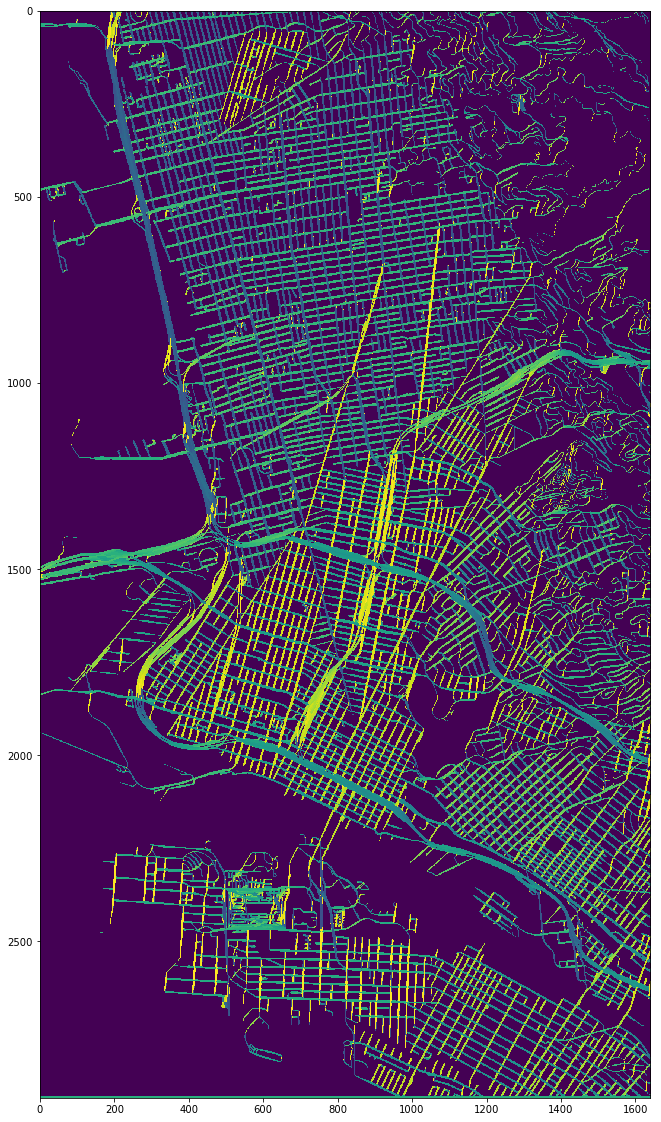

In [7]:
argmaxed_orientation_map=np.zeros(orientation_maps[0].shape)
for i in range(orientation_maps[0].shape[0]):
    for j in range(orientation_maps[0].shape[1]):
        calcmax=0
        for laynum in range(len(orientation_maps)):
            if orientation_maps[laynum][i,j]>calcmax:
               calcmax=orientation_maps[laynum][i,j]
               argmaxed_orientation_map[i,j]=laynum
plt.figure(figsize=(20,20))
plt.imshow((argmaxed_orientation_map[50:-49,50:-49]+10)*og_streetmap)

Or we could try normalizing everything by the average strength of the response at that point. This will essentially factor out density from our further computations

In [ ]:
magnitude_map=np.zeros(orientation_maps[0].shape)
for i in range(orientation_maps[0].shape[0]):
    for j in range(orientation_maps[0].shape[1]):
        for layer in orientation_maps:
            magnitude_map[i,j]+=layer[i,j]
magnitude_map/=len(orientation_maps)
plt.figure(figsize=(20,20))
plt.imshow(magnitude_map)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow((orientation_maps[24]/magnitude_map)[50:-49,50:-49])

In [ ]:
spread_map=np.zeros(orientation_maps[0].shape)
for i in range(orientation_maps[0].shape[0]):
    for j in range(orientation_maps[0].shape[1]):
        maglist=[]
        for layer in orientation_maps:
            maglist.append(layer[i,j])
        maglist.sort()
        spread_map[i,j]=(maglist[15]-maglist[0])
plt.figure(figsize=(20,20))
plt.imshow(spread_map)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(spread_map/magnitude_map)

In [11]:
ky=10
kx=10
#entropies=np.zeros([287,159])
for kx in np.r_[1500:1921-50:10]:
    for ky in np.r_[0:1641-50:10]:
        overlay=((argmaxed_orientation_map[50:-49,50:-49]+10)*og_streetmap)[ky:ky+50,kx:kx+50]
        #find amount of each
        freqs=map(lambda x: np.sum(overlay==x),np.r_[10.:50])
        freqsum=sum(freqs)+0.0
        if freqsum!=0:
            freqs=map(lambda x:x/freqsum,freqs)
            entropies[int(ky/10),int(kx/10)]=-sum(map(lambda x:0 if x==0 else x*np.log(x),freqs))
        else:
            entropies[int(ky/10),int(kx/10)]=0
    if kx % 100==0:
        print kx

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


IndexError: index 159 is out of bounds for axis 1 with size 159

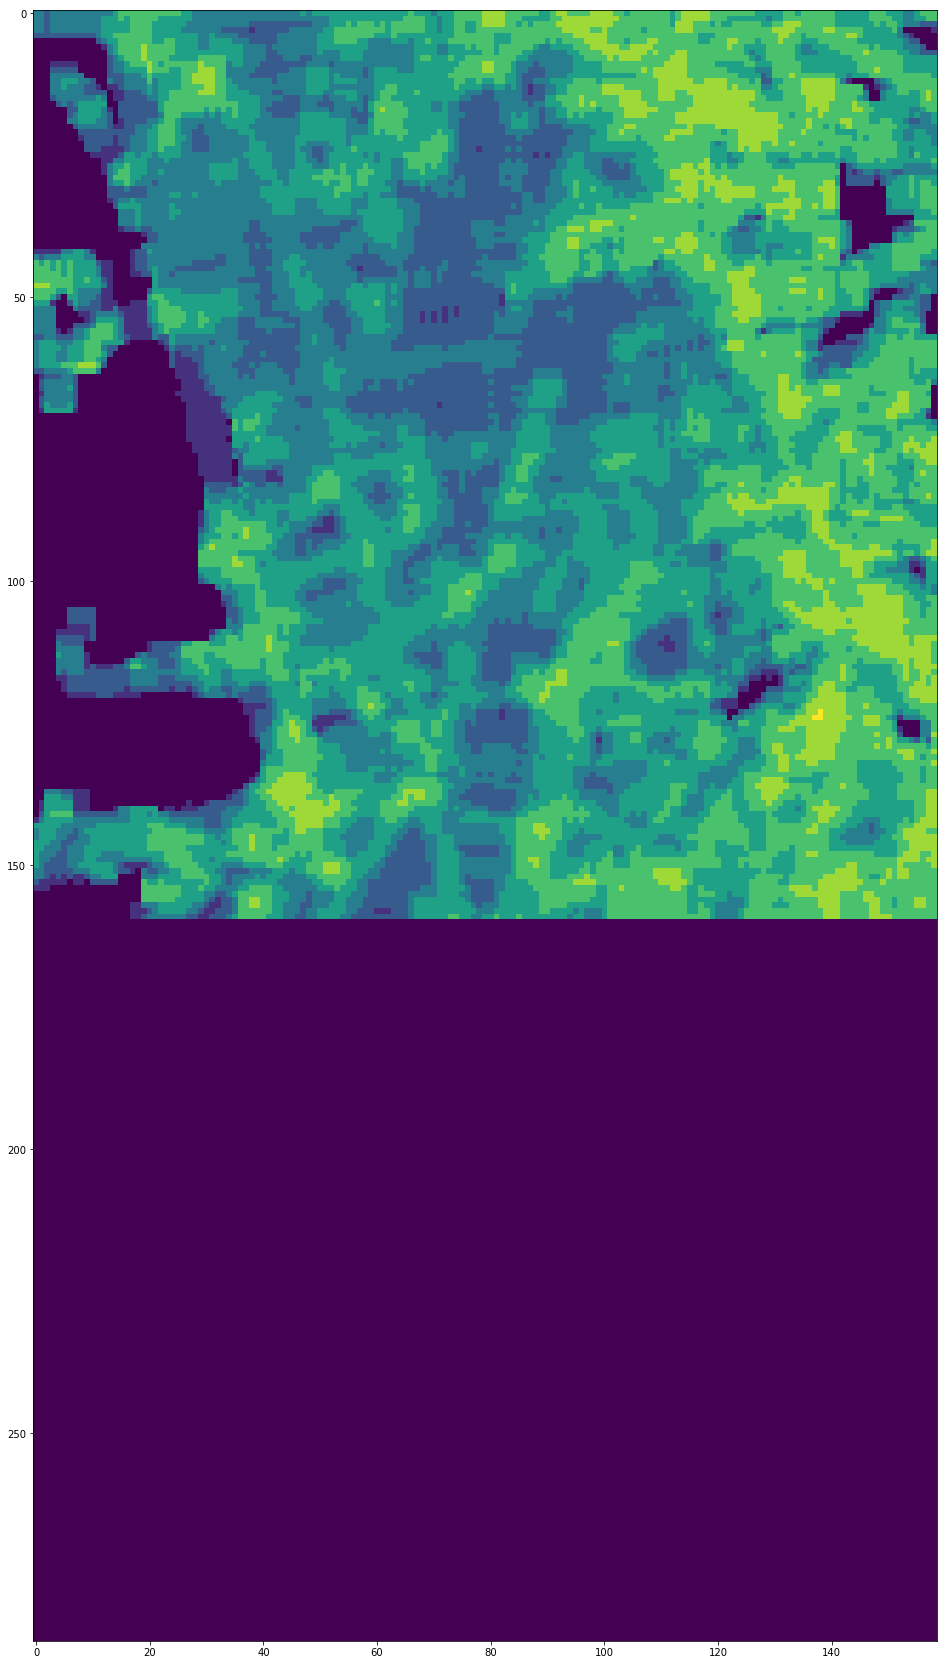

In [15]:
plt.figure(figsize=(30,30))
plt.imshow(np.round(entropies*2))

In [101]:
og_streetmap.shape

(2921L, 1641L)

0